In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as FU
from collections import deque
import matplotlib.pyplot as plt
import torch.multiprocessing as mp
import time
import os
from NEW_NET import CriticNet

In [7]:
def f(x,y,z):
    print(x,y,z)
f(*zip(*[(1,2,3),(4,5,6)]))

(1, 4) (2, 5) (3, 6)


In [2]:
str(('1',2,3))

"('1', 2, 3)"

In [2]:
a=np.array(0)
a.item()
# from pprint import pprint
print(a.item())

0


In [3]:
import sqlite3
conn=sqlite3.connect('test.db')
curs=conn.cursor()
curs.execute('''create table zoo (critter varchar(20) primary key, count int, damages float)''')

OperationalError: table zoo already exists

In [4]:
curs.execute('insert into zoo values("duck2",5,0.0)')

IntegrityError: UNIQUE constraint failed: zoo.critter

In [5]:
conn.commit()

In [6]:
from pprint import pprint as print
curs.execute('select * from zoo')
rows=curs.fetchall()
print(rows)

[('duck', 5, 0.0), ('duck2', 5, 0.0)]


In [1]:
type(rows)

NameError: name 'rows' is not defined

In [6]:
def is_prime(n: int):
    result = True
    for k in range(2, int(n ** 0.5) + 1):
        if n % k == 0:
            result = False
            break
    return result

def count_primes(n: int) -> int:
    count = 0
    for k in range(2, n):
        if is_prime(k):
            count += 1

    return count

print(count_primes(10000000))

664579


In [10]:
import taichi as ti
ti.init()
# ti.init(arch=ti.gpu)

@ti.func
def is_prime(n: int):
    result = True
    for k in range(2, int(n ** 0.5) + 1):
        if n % k == 0:
            result = False
            break
    return result

@ti.kernel
def count_primes(n: int) -> int:
    count = 0
    for k in range(2, n):
        if is_prime(k):
            count += 1

    return count

print(count_primes(10000000))

[Taichi] Starting on arch=x64
664579


In [20]:
ti.kernel??

Signature: ti.kernel(fn)
Source:   
def kernel(fn):
    """Marks a function as a Taichi kernel.

    A Taichi kernel is a function written in Python, and gets JIT compiled by
    Taichi into native CPU/GPU instructions (e.g. a series of CUDA kernels).
    The top-level ``for`` loops are automatically parallelized, and distributed
    to either a CPU thread pool or massively parallel GPUs.

    Kernel's gradient kernel would be generated automatically by the AutoDiff system.

    See also https://docs.taichi-lang.org/docs/syntax#kernel.

    Args:
        fn (Callable): the Python function to be decorated

    Returns:
        Callable: The decorated function

    Example::

        >>> x = ti.field(ti.i32, shape=(4, 8))
        >>>
        >>> @ti.kernel
        >>> def run():
        >>>     # Assigns all the elements of `x` in parallel.
        >>>     for i in x:
        >>>         x[i] = i
    """
    return _kernel_impl(fn, level_of_class_stackframe=3)
File:      ~/anaconda3/envs

In [19]:
import taichi as ti
import numpy as np

# ti.init(arch=ti.cpu)

benchmark = True

N = 15000

f = ti.field(dtype=ti.i32, shape=(N + 1, N + 1))

if benchmark:
    a_numpy = np.random.randint(0, 100, N, dtype=np.int32)
    b_numpy = np.random.randint(0, 100, N, dtype=np.int32)
else:
    a_numpy = np.array([0, 1, 0, 2, 4, 3, 1, 2, 1], dtype=np.int32)
    b_numpy = np.array([4, 0, 1, 4, 5, 3, 1, 2], dtype=np.int32)


@ti.kernel
def compute_lcs(a: ti.types.ndarray(), b: ti.types.ndarray()) -> ti.i32:
    len_a, len_b = a.shape[0], b.shape[0]

    ti.loop_config(serialize=True) # 避免 Taichi 自动并行
    for i in range(1, len_a + 1):
        for j in range(1, len_b + 1):
            f[i, j] = ti.max(f[i - 1, j - 1] + (a[i - 1] == b[j - 1]),
                          ti.max(f[i - 1, j], f[i, j - 1]))

    return f[len_a, len_b]


print(compute_lcs(a_numpy, b_numpy))

2718


In [ ]:
# import taichi as ti
import numpy as np

# ti.init(arch=ti.cpu)

benchmark = True

N = 15000

f = ti.field(dtype=ti.i32, shape=(N + 1, N + 1))

if benchmark:
    a_numpy = np.random.randint(0, 100, N, dtype=np.int32)
    b_numpy = np.random.randint(0, 100, N, dtype=np.int32)
else:
    a_numpy = np.array([0, 1, 0, 2, 4, 3, 1, 2, 1], dtype=np.int32)
    b_numpy = np.array([4, 0, 1, 4, 5, 3, 1, 2], dtype=np.int32)


# @ti.kernel
def compute_lcs(a: ti.types.ndarray(), b: ti.types.ndarray()) -> ti.i32:
    len_a, len_b = a.shape[0], b.shape[0]

    ti.loop_config(serialize=True) # 避免 Taichi 自动并行
    for i in range(1, len_a + 1):
        for j in range(1, len_b + 1):
            f[i, j] = max(f[i - 1, j - 1] + (a[i - 1] == b[j - 1]),
                          max(f[i - 1, j], f[i, j - 1]))

    return f[len_a, len_b]


print(compute_lcs(a_numpy, b_numpy))

In [7]:
uu=999
def f(x):
    u=123
    x=eval('uu')
    return x
print(f(0))

999


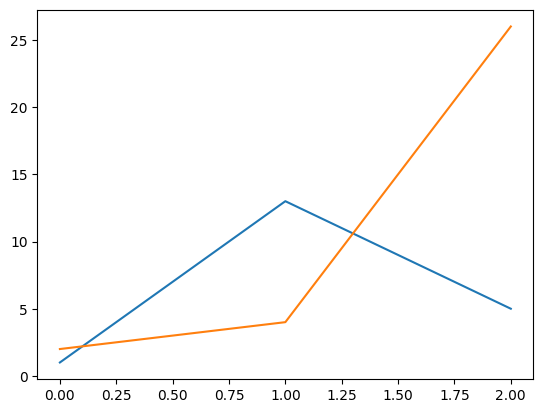

In [3]:
plt.plot([(1,2),(13,4),(5,26)])

In [10]:
a=torch.ones((300,400),device='cuda')
for _ in range(1000000):
    a+=1

In [13]:
for _ in range(10000):
    a=torch.tensor(np.random.normal(size=(100,100)),device='cuda')

In [14]:
for _ in range(10000):
    a=torch.rand(size=(100,100),device='cuda')

In [13]:
a=[i for i in range(100000)]

In [17]:
torch.normal(mean=0,size=(2,3))

TypeError: normal() received an invalid combination of arguments - got (size=tuple, mean=int, ), but expected one of:
 * (Tensor mean, Tensor std, *, torch.Generator generator, Tensor out)
 * (Tensor mean, float std, *, torch.Generator generator, Tensor out)
 * (float mean, Tensor std, *, torch.Generator generator, Tensor out)
 * (float mean, float std, tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [15]:
l=[0]*1000000
for i in range(len(l)):
    l[i]=i

: 

: 

In [8]:
np.hstack([np.array([1,2]),3])

array([1, 2, 3])

In [6]:
a=torch.ones((10,100))
b=[np.arange(100)]*10
for _ in range(100000):
    for i in range(a.shape[0]):
        a[i]=torch.tensor(b[i])

In [7]:
a=torch.ones((10,100))
b=[np.arange(100)]*10
for _ in range(100000):
    a[:]=torch.tensor(np.array(b))

In [27]:
np.array([(1,2,3),(3,4,5)])

array([[1, 2, 3],
       [3, 4, 5]])

In [25]:
# mp.set_start_method('spawn')
# os.environ['OMP_NUM_THREADS'] = "1"
def fm(x):
    print(x)
td3_qnet2=CriticNet(34,3,500).to('cuda')
td3_qnet2.share_memory()
p=mp.Process(target=fm,args=(td3_qnet2,))
p.start()
time.sleep(2)
p.terminate()
p.join()

CriticNet(
  (base_net): Sequential(
    (0): Linear(in_features=34, out_features=500, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=500, out_features=1, bias=True)
  )
)


In [60]:
mp.set_start_method??

Signature: mp.set_start_method(method, force=False)
Docstring: <no docstring>
Source:   
    def set_start_method(self, method, force=False):
        if self._actual_context is not None and not force:
            raise RuntimeError('context has already been set')
        if method is None and force:
            self._actual_context = None
            return
        self._actual_context = self.get_context(method)
File:      ~/anaconda3/envs/py39/lib/python3.9/multiprocessing/context.py
Type:      method


In [38]:
a=torch.tensor([1,2,3])
b=a.to('cuda')

In [46]:
a.to('cuda')
a.share_memory_()

tensor([1, 2, 3])

In [34]:
td3_qnet2=CriticNet(34,3,500)
x=td3_qnet2.to('cuda')

In [35]:
next(x.parameters()).device

device(type='cuda', index=0)

In [36]:
next(td3_qnet2.parameters()).device

device(type='cuda', index=0)

In [37]:
id(x)

139994012056400

In [42]:
x.share_memory()

CriticNet(
  (base_net): Sequential(
    (0): Linear(in_features=34, out_features=500, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=500, out_features=1, bias=True)
  )
)

In [2]:
a=torch.ones((1000,500)).to('cuda')
b=torch.ones((1000,500)).to('cuda')

In [3]:
a.device

device(type='cuda', index=0)

In [4]:
a.to(a.device)

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], device='cuda:0')

In [8]:
for _ in range(30000):
    c=torch.cat([a,b],dim=-1)

In [41]:
a=np.zeros((3,4))
b=a[[2,1]]

In [42]:
b[1]=3

In [43]:
b

array([[0., 0., 0., 0.],
       [3., 3., 3., 3.]])

In [44]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
x=1
for _ in range(10000000):
    if x==1:
        pass
    else:
        pass

In [26]:
p=0
x=100
for _ in range(100000003):
    p+=1
    p%=x
print(p)

3


In [27]:
p=0
x=100
for _ in range(100000003):
    p=(p+1)%x
print(p)

3


In [13]:
np.mean([1,2,3])

2.0

In [11]:
np.random.exponential??

Docstring:
exponential(scale=1.0, size=None)

Draw samples from an exponential distribution.

Its probability density function is

.. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),

for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
The rate parameter is an alternative, widely used parameterization
of the exponential distribution [3]_.

The exponential distribution is a continuous analogue of the
geometric distribution.  It describes many common situations, such as
the size of raindrops measured over many rainstorms [1]_, or the time
between page requests to Wikipedia [2]_.

.. note::
    New code should use the ``exponential`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
scale : float or array_like of floats
    The scale parameter, :math:`\beta = 1/\lambda`. Must be
    non-negative.
size : int or tuple

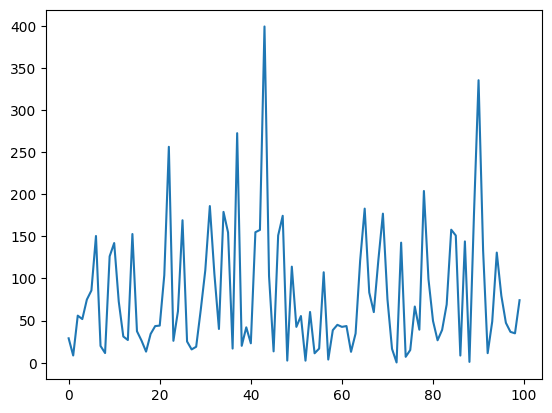

In [12]:
plt.plot(np.random.exponential(100,size=100))

In [50]:
a=[np.array([1,2,3,4])]*100

In [51]:
for _ in range(10000):
    np.array(a)

In [54]:
for _ in range(10000):
    torch.tensor(a)

/tmp/ipykernel_22610/3829469559.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  torch.tensor(a)


In [42]:
a=np.arange(9).reshape(1,-1)

In [43]:
for _ in range(1000000):
    a.T.dot(a)

In [44]:
b=np.arange(18).reshape(1,-1)

In [45]:
for _ in range(1000000):
    b.T.dot(b)

In [82]:
for _ in range(1000000):
    np.array(list({'v':[1,7],'t':[2,4]}.values()))

In [81]:
for _ in range(1000000):
    np.array([u for u in {'v':[1,7],'t':[2,4]}.values()])

In [46]:
u={'v':1,'t':2}
list(u.values())

[1, 2]

In [7]:
a=[{'r':1,'c':2}]*10
np.array(a)

array([{'r': 1, 'c': 2}, {'r': 1, 'c': 2}, {'r': 1, 'c': 2},
       {'r': 1, 'c': 2}, {'r': 1, 'c': 2}, {'r': 1, 'c': 2},
       {'r': 1, 'c': 2}, {'r': 1, 'c': 2}, {'r': 1, 'c': 2},
       {'r': 1, 'c': 2}], dtype=object)

In [42]:
d=pd.DataFrame(a)
x=d.T.to_dict()

In [52]:
np.array([list(t.values()) for t in list(x.values())])

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [56]:
p={'a':[1]*10,'t':[1]*10,'u':[1]*10}
n=10
for _ in range(10000):
    [{k:p[k][i] for k in p} for i in range(n)]

In [65]:
a=pd.DataFrame(np.arange(12).reshape(3,4))

In [66]:
for _ in range(10000):
    x=a[[1,2]]

In [55]:
for _ in range(10000):
    np.array([list(t.values()) for t in list(x.values())])

In [54]:
for _ in range(10000):
    for i,row in d.iterrows():
        row['r']=9

In [34]:
for _ in range(10000):
    for key in x:
        x[key]['r']=9

In [37]:
pd.DataFrame(x).T

,r,c
0,9,2
1,9,2
2,9,2
3,9,2
4,9,2
5,9,2
6,9,2
7,9,2
8,9,2
9,9,2


In [36]:
x

{0: {'r': 9, 'c': 2},
 1: {'r': 9, 'c': 2},
 2: {'r': 9, 'c': 2},
 3: {'r': 9, 'c': 2},
 4: {'r': 9, 'c': 2},
 5: {'r': 9, 'c': 2},
 6: {'r': 9, 'c': 2},
 7: {'r': 9, 'c': 2},
 8: {'r': 9, 'c': 2},
 9: {'r': 9, 'c': 2}}

In [4]:
import itertools
x=np.arange(4)
for i in itertools.permutations(x,4):
    print(i)
x

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)
(0, 2, 3, 1)
(0, 3, 1, 2)
(0, 3, 2, 1)
(1, 0, 2, 3)
(1, 0, 3, 2)
(1, 2, 0, 3)
(1, 2, 3, 0)
(1, 3, 0, 2)
(1, 3, 2, 0)
(2, 0, 1, 3)
(2, 0, 3, 1)
(2, 1, 0, 3)
(2, 1, 3, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(3, 0, 1, 2)
(3, 0, 2, 1)
(3, 1, 0, 2)
(3, 1, 2, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)


array([0, 1, 2, 3])

In [1]:
x=0
for i in range(x,10):
    print(i)
    x+=2

0
1
2
3
4
5
6
7
8
9


In [6]:
d={'a':1,'b':2}
d['a']

1

In [3]:
data=pd.DataFrame(np.ones((3,4)))
for i,row in data.iterrows():
    row[3]=9
data

,0,1,2,3
0,1.0,1.0,1.0,9.0
1,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,9.0


In [10]:
l=np.array([0]*10000000)
x=0
for s in l:
    x=s

In [2]:
np.arange(12).std()

3.452052529534663

In [18]:
a=np.zeros((3,4)).tolist()
for x in a:
    x[:]=[1,1,1]
print(a)

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]


In [30]:
a=np.zeros((3,4))
a[0][:][:][:]=1
a

array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [3]:
for _ in range(100000):
    x=np.random.normal(100,10)
    if x<50:
        print(x)

In [4]:
(np.random.normal(120,20,1000000)<10).sum()

0

In [10]:
np.random.binomial(6,0.5,100)

array([3, 3, 3, 2, 3, 6, 6, 3, 2, 3, 6, 3, 2, 2, 1, 2, 2, 3, 2, 4, 3, 3,
       3, 2, 4, 2, 1, 3, 4, 4, 6, 3, 5, 5, 3, 4, 3, 5, 1, 3, 3, 4, 4, 5,
       1, 3, 3, 4, 3, 4, 2, 3, 3, 2, 5, 2, 3, 4, 3, 3, 3, 5, 3, 5, 3, 3,
       4, 2, 4, 3, 4, 3, 2, 3, 3, 3, 2, 4, 3, 4, 5, 2, 1, 3, 4, 5, 3, 1,
       3, 0, 1, 1, 5, 3, 1, 2, 2, 6, 3, 1])

In [2]:
a=np.zeros((3,4)).tolist()
a

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]

In [ ]:
class Short_Delay:
    def __init__(self,pv,init_loc,wait,task_list:list(float,float,np.array)):
        self.pv=pv
        self.init_loc=init_loc
        self.wait=wait
        self.task_list=task_list
    
    def __call__(self):
        pass


In [ ]:
f=lambda x:x*(x-1) if x else 1
%time [6*5*4*3*281 for _ in range(100)]

In [ ]:
f=lambda x:x*(x-1) if x else 1
%time [f(6) for _ in range(100)]

In [ ]:
x=np.random.uniform(1,2,1000)
%time [y for y in x]

In [ ]:
%time [np.random.uniform(1,2) for _ in range(1000000)]

In [ ]:
a=np.zeros((1345,521))
a[:]=3
%time [a.T.T.T for _ in range(1000)]

In [ ]:
a=torch.ones((2,3))
a=a.unsqueeze(1)
a

In [ ]:
a=torch.ones((2,3)).reshape(2,1,3)
a

In [ ]:
a=np.array([[1,2]])
a[:]=1
a

In [ ]:
d=pd.DataFrame(np.zeros((5,3)),columns=list('ABC'))
d['A']=[(1,2) for _ in range(5)]
d['A']=[(4,5) for _ in range(5)]
d['A'].update(pd.Series([(6,6)]*2,index=[0,4]))
d

In [ ]:
list({'2','5'})

In [ ]:
a=torch.zeros((3,2))
b=torch.cat((a,a),dim=1)
b[0]=1
print(b)
print(a)

In [ ]:
from NEW_NET import QNet
net=QNet(50,30,300,3,500,10,3)
net.base_net[7].load_state_dict(net.base_net[5].state_dict())

In [ ]:
def onehot_from_logits(logits, eps=0.01):
    ''' 生成最优动作的独热(one-hot)形式 '''
    argmax_acs = (logits == logits.max(-1, keepdim=True)[0]).float()
    # 生成随机动作,转换成独热形式
    rand_acs = torch.autograd.Variable(torch.eye(logits.shape[-1])[[
        np.random.choice(range(logits.shape[-1]), size=logits.shape[:-1])
    ]],
                                       requires_grad=False).to(logits.device)
    # 通过epsilon-贪婪算法来选择用哪个动作
    return torch.stack([torch.stack([argmax_acs[i,j] if r > eps else rand_acs[i,j] for j,r in enumerate(r_i)]) for i,r_i in enumerate(torch.rand(logits.shape[:-1]))])


def sample_gumbel(shape, eps=1e-20, tens_type=torch.FloatTensor):
    """从Gumbel(0,1)分布中采样"""
    U = torch.autograd.Variable(tens_type(*shape).uniform_(),
                                requires_grad=False)
    return -torch.log(-torch.log(U + eps) + eps)


def gumbel_softmax_sample(logits, temperature):
    """ 从Gumbel-Softmax分布中采样"""
    y = logits + sample_gumbel(logits.shape, tens_type=type(logits.data)).to(
        logits.device)
    return FU.softmax(y / temperature, dim=-1)


def gumbel_softmax(logits, temperature=1.0):
    """从Gumbel-Softmax分布中采样,并进行离散化"""
    y = gumbel_softmax_sample(logits, temperature)
    y_hard = onehot_from_logits(y)
    y = (y_hard.to(logits.device) - y).detach() + y
    # 返回一个y_hard的独热量,但是它的梯度是y,我们既能够得到一个与环境交互的离散动作,又可以
    # 正确地反传梯度
    return y

In [ ]:
a=torch.rand(size=(3,4,5))

In [ ]:
gumbel_softmax(a)

In [ ]:
a

In [ ]:
onehot_from_logits(a)

In [ ]:
a.max(-1, keepdim=True)

In [ ]:
np.random.randint(int(np.Inf))

In [ ]:
from scipy.stats import truncnorm
def get_truncated_normal(mean=0, sd=1, low=1, upp=11):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X=get_truncated_normal()

In [ ]:
BIGNUM=2**16-1
class RVS:
    def __init__(self,seed,X):
        self.rng=np.random.RandomState(seed)
        self.X=X
    
    def __iter__(self):
        return self
    
    def __next__(self):
        return self.X.rvs(size=2,random_state=self.rng.randint(BIGNUM))

In [ ]:
a=RVS(0,X)
for _ in range(100):
    print(next(a))

In [ ]:
2**16-1

In [ ]:
a=np.array([0,-2])
np.linalg.norm(a,0)

In [ ]:
from NEW_NET import QNet
anet=QNet(1000,0,300,1,100,1,1)
anet

In [ ]:
a=np.zeros((3,4))
a[:]=[[1,2,3,4]]
np.expand_dims(a,0)

In [ ]:
from NEW_NET import CNNMLPNet
'''input_size,base_deep,base_width,top_deep,top_width,output_size,outnet_num'''
net=CNNMLPNet({'pro':5,'task':6},[3,[(3,4,100,1,3,4),(3,4,100,1,3,4)]],[3,[(3,4,100,1,3,4),(3,4,100,1,3,4)]],[None,1,40,1,100,5,1])

In [ ]:
x0={'pro':torch.randn((5,3,5)),'task':torch.randn((5,3,6))}

In [ ]:
net(x0)

In [ ]:
from NEW_NET import CNNNet
net=CNNNet(5,[(3,4,10,1,3,4),(3,4,10,1,3,4)])
x=torch.randn((3,5,10))
net(x)

In [ ]:
from NEW_NET import CNNBaseNet
net=CNNBaseNet(5,1,1,6,1,1,1)
x=torch.randn((2,5,5))
net(x)

In [ ]:
a=np.arange(12).reshape(3,4)
a.copy()[[True,True,False],:]=1
a

In [ ]:
w=deque(maxlen=3)
w.append([1,2])
w.append([3,4])

In [ ]:
for i in w:
    print(i)

In [ ]:
a=torch.tensor([1.2,1.3])
a

In [ ]:
a=a.int()
a

In [ ]:
a='1.2'
float(a)

In [ ]:
a=pd.DataFrame(np.arange(12).reshape(3,4))
a.values.T.reshape(1,-1)

In [ ]:
a.values

In [ ]:
a='[1.3,2,3]'
a[1:-1].split(',')


In [ ]:
[float(x) for i,x in enumerate(list(a)[1:]) if i%2==0]

In [ ]:
class R:
    def __init__(self,l) -> None:
        self.l=l
    def __iter__(self):
        return self
    def __next__(self):
        return self.l
a=list()
r=R(a)
b=next(r)
id(a)==id(b)
b.append(1)
r.l

In [ ]:
a=torch.tensor([[1,2,3],[0,5,6]])
b=torch.tensor([[7,8,9],[2,3,1]])
torch.min(a,b)

In [ ]:
x=torch.tensor([1,1,1])
list(x.numpy())

In [ ]:
a=torch.tensor([0,1,0])
b=torch.tensor([1,0,1])
torch.min(a,b)

In [ ]:
a=torch.tensor([0.999999999,1-0.999999999],dtype=torch.float32)
a.requires_grad=True
b=(a*(a.log())).mean()
b.backward()
a.grad

In [ ]:
a=torch.tensor([1,-1e8,1,1,1],dtype=torch.float32)
a.requires_grad=True
b=FU.softmax(a,dim=0)
b[0].backward()
a.grad

In [ ]:
a=torch.tensor([1,1,1],dtype=torch.float32)
a.requires_grad=True
# b=a*torch.tensor([1,1,1])
# b.retain_grad()
c=a-torch.tensor([0,1e8,0])
c.retain_grad()

In [ ]:
x=-(FU.log_softmax(c,dim=0)*FU.softmax(c,dim=0)).mean()
x.retain_grad()
x.backward()

In [ ]:
x.grad

In [ ]:
c.grad

In [ ]:
x

In [ ]:
a.grad

In [ ]:
x=FU.log_softmax(c,dim=0)

In [ ]:
x[0].backward()

In [ ]:
a.grad

In [ ]:
a=torch.zeros((3,3))
tuple(a.max(dim=1)[0])

In [ ]:
a=np.array([3,2,1])
b=np.sort(a)
tuple(b)

In [ ]:
str('a')

In [ ]:
p=pd.DataFrame(np.zeros((20,5)),columns=['c','r','v','loc','q'])
rns=np.random.RandomState(1)
p_l=len(p.index)
p['c']=rns.uniform(1,10,p_l)
p['r']=rns.uniform(1,10,p_l)
p['v']=rns.uniform(1,10,p_l)
p['loc']=[np.sort(rns.uniform(1,100,2)) for _ in range(p_l)]
p['q']=[tuple(np.sort(rns.uniform(1,10,2))) for _ in range(p_l)]

In [ ]:
p

In [ ]:
p=pd.DataFrame([[7,19,3,np.array([0,0]),(1,3)],
                [11,1,11,np.array([1,0]),(6,7)],
                [1,10,12,np.array([0,9]),(5,6)],
                [10,10,12,np.array([5,2]),(5,6)],
                [190,10,12,np.array([0,2]),(5,6)],
                [10,1,12,np.array([6,2]),(5,6)],
                [110,6,192,np.array([0,2]),(5,6)],
                [10,10,172,np.array([3,2]),(5,6)]],
                columns=['c','r','v','loc','q'],index=list('ABCDEFGH'))

In [ ]:
p=pd.read_csv('df_umap.csv')


In [ ]:
B=p.loc[p['label']=='Benign']
B.to_csv('B.csv')

In [ ]:
p=pd.DataFrame([[0,0,0]],columns=list('xyz'))

In [ ]:
p.to_csv('p.csv',index=False)

In [ ]:
p=pd.DataFrame(np.zeros((3,3)))
np.save('p.csv',p.to_csv())

In [ ]:
np.savetxt('pp.csv',p.values)

In [ ]:
x=torch.FloatTensor([1])
x.requires_grad=True

In [ ]:
1.2**4-1

In [ ]:
1-0.8**4

In [ ]:
y=x
y.backward()
x.grad

In [ ]:
y=x*torch.FloatTensor([1,1])
y.sum().backward()
x.grad

In [ ]:
100//10

In [ ]:
import time
from tqdm import tqdm
 
#  total参数设置进度条的总长度为100
with tqdm(total=10000000) as pbar:
    for i in range(10000000):
        #time.sleep(0.1)
        #  每次更新进度条的长度为1
        pbar.update(1)

In [ ]:
a=torch.zeros((3,3))
torch.distributions.Categorical(logits=a[0]).sample().item()

In [ ]:
a=np.zeros((3,3),dtype='int32')
a[0][0].dtype

In [ ]:
a=np.arange(12).reshape(3,4)
np.vstack((a,a)).reshape(-1,3,4)

In [ ]:
a=torch.tensor(np.arange(12).reshape(3,4))
a

In [ ]:
torch.concat((a,a),dim=0)

In [ ]:
a[range(3),[1,2,3]]

In [ ]:
a=torch.tensor([1/1e-8])
not a

In [ ]:
a=torch.zeros((3,3))
b=(a==1).double()
b[0,0].dtype

In [ ]:
[2 if not i%2 else 1 if i<9 else 8 for i in range(10)]

In [ ]:
a=np.arange(24).reshape(2,3,4)
a=torch.tensor(a)
a.transpose(1,2)==a.transpose(2,1)

In [ ]:
a

In [ ]:
torch.reshape(torch.unsqueeze(torch.tensor(a).transpose(2,1),0),(-1,))

In [ ]:
import torch.nn as nn
s=nn.Sequential(*[nn.Linear(3,3)])
s.append(nn.Linear(3,3))
s.append(nn.Linear(3,5))

In [ ]:
def f_t(a:list,b:list):
    x=np.array([(i,j) for i,j in zip(a,b)])
    np.random.shuffle(x)
    for i,y in enumerate(x):
        a[i],b[i]=y[0],y[1]

In [ ]:
a=[1,2,3,4,5]
b=[-1,-2,-3,-4,-5]
f_t(a,b)
print(a,b)

In [ ]:
import torch

In [ ]:
a=torch.tensor([[]])
a.size()

In [ ]:
a=torch.tensor([[]],device=a.device)

In [ ]:
c=torch.cat([a],1)
c.size()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.Series([1.0,2,23])

In [ ]:
type(data.values)

In [ ]:
type(data.index)

In [ ]:
data.index

In [ ]:
data[1]

In [ ]:
data[1:2]

In [ ]:
data=pd.Series([1,2,3,4],index=['we','a','w','ac'])

In [ ]:
data

In [ ]:
data['a':'w']

In [ ]:
data['a']

In [ ]:
data={'a':1,'b':2,'c':3}

In [ ]:
data=pd.Series(data)

In [ ]:
data

In [ ]:
s=pd.DataFrame({'er':data,'zc':data})

In [ ]:
s['er']

In [ ]:
s=pd.DataFrame(data,columns=['ee'])

In [ ]:
s

In [ ]:
A=np.zeros((3,3),dtype=[('A','i8'),('B','f8')])

In [ ]:
A

In [ ]:
A['A']+A['B']

In [ ]:
ind=pd.Index([2,3,54,34])

In [ ]:
ind

In [ ]:
A.size

In [ ]:
ind.ndim

In [ ]:
ind[1]=0

In [ ]:
data=pd.Series([0.25,0.5,0.75,1.0],index=['a','b','c','d'])

In [ ]:
data

In [ ]:
data[-1]

In [ ]:
data[0:2]

In [ ]:
data['a':'c']

In [ ]:
data>0.3

In [ ]:
data[data>0.3]

In [ ]:
data[['a']]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.DataFrame(np.random.random((3,4)),columns=['a','b','c','d'],index=['q1','q2','q3'])

In [ ]:
data

In [ ]:
data['a']

In [ ]:
data['a':'c']

In [ ]:
data['e']=data['a']/data['b']

In [ ]:
data

In [ ]:
data.T

In [ ]:
data

In [ ]:
data.iloc[:2,:2]

In [ ]:
data.loc[data.a<0.5]

In [ ]:
data.a<0.5

In [ ]:
a=np.arange(12).reshape(3,4)

In [ ]:
a

In [ ]:
a[(1,2)]

In [ ]:
a[(1,2),(2,1)]

In [ ]:
a[([0,1,2],[0,1,2])]

In [ ]:
a[a>1]

In [ ]:
a

In [ ]:
a>1

In [ ]:
a[a>-1]

In [ ]:
a[a[:,0]>1,:]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rng=np.random.RandomState(42)
ser=pd.Series(rng.randint(0,10,4))
ser

In [ ]:
df=pd.DataFrame(rng.randint(0,10,(3,4)),columns=list('ABCD'))

In [ ]:
df

In [ ]:
np.exp(ser)

In [ ]:
np.sin(df*np.pi/4)

In [ ]:
area=pd.Series({'T':5433,'Alaska':111,'C':5435},name='area')
p=pd.Series({'C':111,'T':5433,'N':534},name='pp')
p.div(area,fill_value=111)

In [ ]:
area.index.union(p.index)

In [ ]:
p_dict={'T':5433,'Alaska':111,'C':5435}
a=pd.Series(p_dict)
a

In [ ]:
A=pd.DataFrame(rng.randint(0,20,(2,2)),columns=list('AB'))
B=pd.DataFrame(rng.randint(0,10,(3,3)),columns=list('BAC'))

In [ ]:
A

In [ ]:
B

In [ ]:
A+B

In [ ]:
A.stack()

In [ ]:
A.values

In [ ]:
A

In [ ]:
B

In [ ]:
B-B.iloc[0]

In [ ]:
B.subtract(B['A'],axis=1)

In [ ]:
B['A']

In [ ]:
B-B['A']

In [ ]:
B.iloc[0]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.DataFrame(np.random.uniform(0,1,(4,7)))

In [ ]:
data

In [ ]:
y=np.array([0,1,0,1]==np.ones(4))

In [ ]:
y

In [ ]:
data[y]

In [ ]:
for d in data.iterrows():
    print(d[1])

In [ ]:
l=[1,2]
max(l)

In [ ]:
import numpy as np
[1,1]-np.array([1,0])

In [ ]:
print(np.array([1,1]))

In [ ]:
np.array((1,2))

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
a=pd.DataFrame(np.random.uniform(size=(3,3)),columns=list('ABC'))

In [ ]:
a[['B','A']]

In [ ]:
a=np.array([1,2])
data=pd.DataFrame({'loc':[1,2,3,4]})

In [ ]:
data

In [ ]:
b=data['loc']
b['0']=1
data

In [ ]:
data['loc'][0]=99
data

In [ ]:
max(data['loc'])

In [ ]:
np.hstack(data['loc'].values)

In [ ]:
0.1==0

In [ ]:
a

In [ ]:
np.random.choice(5,p=np.ones(5)/5)

In [ ]:
b=a[0]
b[0]=7
a

In [ ]:
a==1

In [ ]:
a+(a==1)

In [ ]:
a=np.zeros((2,2))

In [ ]:
b=a

In [ ]:
b+=1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.DataFrame(np.arange(12).reshape(3,4),index=list('AAC'))

In [ ]:
data.loc['A']

In [ ]:
a=np.arange(12).reshape(3,4)

In [ ]:
a[(data[0]>1).values]

In [ ]:
type(data.loc['A'])

In [ ]:
type(data[0])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
a=[1,2,3,2]
b=[3,1,2,0]
plt.plot(a,b)